In [ ]:
from IPython.core.display import display_html
display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)

In [1]:
from sys import path; path.insert(1,"../src");
import fubar; from importlib import reload; reload(fubar);

***
< [GMIT Data Analytics](https://web.archive.org/web/20201029063153/https://www.gmit.ie/computer-science-and-applied-physics/higher-diploma-science-computing-data-analytics-ict) | [Home](https://github.com/SeanOhAileasa) | [README](https://github.com/SeanOhAileasa/mls-t-test/blob/main/README.md) >

[![GMIT](https://github.com/SeanOhAileasa/SeanOhAileasa/blob/master/rc/gmit.png?raw=true)](https://web.archive.org/web/20201029063153/https://www.gmit.ie/computer-science-and-applied-physics/higher-diploma-science-computing-data-analytics-ict)

## Machine Learning & Statistics - Course Material 2021
### Topic: [t-test](https://nbviewer.jupyter.org/github/SeanOhAileasa/mls-t-test/blob/main/mls-t-test.ipynb)
***

Course material for the ``Machine Learning & Statistics`` module (5 Credits) of the ``Higher Diploma in Science in Computing (Data Analytics) (H.Dip)`` programme (75 Credits) at **Galway-Mayo Institute of Technology (GMIT)**.

- referenced external link - [Machine Learning & Statistics](https://nbviewer.jupyter.org/github/SeanOhAileasa/mls-machine-learning-statistics/blob/main/mls-machine-learning-statistics.ipynb)

In [2]:
from sys import path; path.insert(1,"../src")
from fubar import fFile,fMagic

In [3]:
%%script bash
grep -1 "def fFile" ../src/fubar.py -A 9

# repository ./SeanOhAileasa
def fFile(nParPath):
    """Start a file with its associated application.

Input: nParPath
Process: (os.path.realpath; os.startfile)
Output: file opened with associated application
"""
    from os import path,startfile
    return startfile(path.realpath(nParPath))
# --- END ---


<a id="top"></a>
***
## Table of Contents
***

## [Abstract](#abstract)

## [Introduction](#introduction) 

* [Simulation](#simulation) <br/><br/>
    * [``numpy``](#simulationnumpy) <br/><br/>
        * [``random``](#simulationnumpyrandom) &#x1F6A7; <br/><br/>
            * [``normal``](#simulationnumpyrandomnormal)&nbsp;&nbsp;|&nbsp;&nbsp;[``:loc``](#simulationnumpyrandomnormalloc)&nbsp;&nbsp;|&nbsp;&nbsp;[``:scale``](#simulationnumpyrandomnormalscale)&nbsp;&nbsp;|&nbsp;&nbsp;[``:size``](#simulationnumpyrandomnormalsize) <br/><br/>
                * [Collections](#simulationnumpyrandomnormalFakeData) ``a`` ``b`` <br/><br/>
    * [``pandas``](#simulationpandas) <br/><br/>
        * [``DataFrame``](#simulationpandasDataFrame) <br/><br/>
    * [``matplotlib``](#simulationmatplotlib) &#x1F6A7; <br/><br/>
        * [``pyplot``](#simulationmatplotlibpyplot) <br/><br/>
            * [``style``](#simulationmatplotlibpyplotstyle) &#x1F6A7; <br/><br/>
                * [``use``](#simulationmatplotlibpyplotstyleuse)&nbsp;&nbsp;|&nbsp;&nbsp;[``:fivethirtyeight``](#simulationmatplotlibpyplotstyleuse) <br/><br/>           
    * [``seaborn``](#simulationseaborn) <br/><br/>
        * [``catplot``](#simulationseaborncatplot)

## [Solution](#solution)

* [``scipy``](#scipy) &#x1F6A7; <br/><br/>
    * [``stats``](#scipystats) 

## [Conclusion](#conclusion)

- &#x1F6A7;

***
## END

< [Table of Contents](#top) | [Introduction](#introduction) | [Solution](#solution) | [Conclusion](#conclusion) | [References](#references) >
<a id="abstract"></a>
***
## Abstract
***

In [ ]:
# fFile("./hide/01-t-tests in Python setup - 18-10-2020.mp4")

- a ``t-test`` is a statistical test that looks for differences in two lists of numbers - asks did the two lists of numbers come from what looks like the same probability distribution [1]

- gives a way of checking if two lists of numbers came from populations that have the same average [1]

- there is an interesting relationship between the ``t-test`` and Ireland - William Sealy Gosset figured out a way to test if two sets of numbers are similar [1]

***
## END

< [Table of Contents](#top) | [Abstract](#abstract) | [Solution](#solution) | [Conclusion](#conclusion) | [References](#references) >
<a id="introduction"></a>
***
## Introduction
***

In [ ]:
# fFile("./hide/02-Simulating data for a t-test - 18-10-2020.mp4")

- doing the actual ``t-test`` using ``scipy.stats`` [2]

< [Table of Contents](#top) | [References](#references) >
<a id="simulation"></a>
***
### Simulation
***

- generating two lists of random numbers [2]

- ``m_a`` and ``m_b`` represents the mean [2]

- ``s_a`` and ``s_b`` (technically not quite right) represents the standard deviation [2]

In [1]:
m_a,s_a,m_b,s_b=1.0,0.4,2.0,0.4

- ``N`` is just a convenience parameter thrown in [2]

In [2]:
N=40 # representing collection len 

< [Table of Contents](#top) | [References](#references) >
<a id="simulationnumpy"></a>
***
###### ``numpy``
***

- allows the creation of really efficient big numerical collections [1]

- typically two-dimensional collection (rectangular) - in the second dimension of the collection all of the collections in the collection have the same length (essentially its a matrix) [1]

- ``numpy`` is really good at creating a collection of collections of numbers and doing operations on them much quicker than python itself [1]

- every element in the two-dimensional collection created with ``numpy`` is supposed to have the same type (typically a float but sometimes integers and strings) [1]

In [3]:
import numpy as np

< [Table of Contents](#top) | [References](#references) >
<a id="simulationnumpyrandom"></a>
***
###### ``random``
***

&#x1F6A7;

< [Table of Contents](#top) | [References](#references) >
<a id="simulationnumpyrandomnormal"></a>
***
###### ``normal``
***

- creating collections ``a`` and ``b`` - both are just collections of numbers wrapped in ``numpy`` arrays - takes the collection of numbers and makes them another collection of numbers with all the ``numpy`` functionality [2]

- the numbers are the same but the ``numpy`` arrays produced are more efficient than the bog-standard collection from python [2]

- ``random`` function ``normal`` is going to generate random numbers on a bell-shaped curve [2]

< [Table of Contents](#top) | [References](#references) >
<a id="simulationnumpyrandomnormalloc"></a>
***
###### ``normal`` ``:loc``
***

- specifying the mean ``m_a`` (and ``m_b``) picks a number that comes out with an average around the mean location ``loc`` - generates a list of numbers centred around $1.0$ [2]

In [4]:
m_a

1.0

In [5]:
m_b # list centered around

2.0

< [Table of Contents](#top) | [References](#references) >
<a id="simulationnumpyrandomnormalscale"></a>
***
###### ``normal`` ``:scale``
***

- the ``scale`` basically means the spread according to ``s_a`` (and ``s_b``) - generally means ``s_a`` is unlikely (roughly speaking - 1 in 100 chance) to generate numbers bigger than $2.5$ and smaller than $-0.5$ (with total $40$) [2] 

< [Table of Contents](#top) | [References](#references) >
<a id="simulationnumpyrandomnormalsize"></a>
***
###### ``normal`` ``:size``
***

In [6]:
N # len of collection

40

< [Table of Contents](#top) | [References](#references) >
<a id="simulationnumpyrandomnormalFakeData"></a>
***
###### Collections ``a`` ``b``
***

In [7]:
m_a

1.0

In [8]:
s_b

0.4

In [9]:
N

40

In [10]:
a=np.random.normal(loc=m_a,scale=s_a,size=N)

In [11]:
a

array([1.41535647, 0.65297171, 1.11466996, 0.96092594, 0.85212105,
       0.79517006, 0.70591747, 1.37616685, 1.62558583, 0.61866738,
       1.07219214, 0.94708684, 0.68399699, 1.06375605, 1.05424727,
       1.11610179, 1.40240457, 0.50988314, 0.67945291, 0.80532356,
       0.57062282, 0.5396679 , 1.13404599, 0.37966318, 1.31132548,
       0.96300024, 0.96192267, 1.06995418, 0.73352621, 1.11296666,
       0.67804084, 1.26211285, 1.29900724, 1.31877218, 1.52768162,
       1.44466168, 0.8120703 , 0.75072043, 1.10953452, 0.82854613])

In [12]:
m_b

2.0

In [13]:
s_b

0.4

In [14]:
b=np.random.normal(loc=m_b,scale=s_b,size=N)

In [15]:
b

array([2.59956411, 2.2525032 , 2.07191427, 2.24554592, 1.46257655,
       2.69319695, 2.19901995, 2.48630818, 2.14275914, 2.60383744,
       1.75544283, 1.5873331 , 1.933721  , 1.74289778, 2.22907796,
       1.59304593, 2.62458299, 1.79287323, 2.45067785, 2.26363218,
       2.32997724, 1.80397354, 1.88736529, 1.90327781, 2.27393435,
       2.11403369, 2.54573331, 2.44142764, 2.45557236, 1.73316153,
       2.30627168, 2.09675105, 2.33480005, 2.3314993 , 2.11224737,
       2.27105925, 1.97482183, 1.85998014, 1.62732754, 1.9666183 ])

< [Table of Contents](#top) | [References](#references) >
<a id="simulationpandas"></a>
***
###### ``pandas``
***

- creates a data structure built from the ``numpy`` collection and allows different types for the columns - (an abstraction on top of ``numpy``) [1]

In [16]:
import pandas as pd

< [Table of Contents](#top) | [References](#references) >
<a id="simulationpandasDataFrame"></a>
***
###### ``DataFrame``
***

- creating a ``DataFrame`` of the ``a`` and ``b`` collections [2] 

- ``A`` is going to be in the column beside the ``a`` collection - ``B`` is going to be in the column beside the ``b`` collection [2]

- the ``a`` collection is meant to be centred around $1.0$ (beside the ``A``) - the ``b`` collection is meant to be centred around $2.0$ (beside the ``B``) [2]

In [17]:
df=pd.DataFrame({
    "Category":["A"]*len(a)+["B"]*len(b),
    "Value":np.hstack([a,b])})

In [18]:
df

,Category,Value
0,A,1.415356
1,A,0.652972
2,A,1.114670
3,A,0.960926
4,A,0.852121
...,...,...
75,B,2.271059
76,B,1.974822
77,B,1.859980
78,B,1.627328


< [Table of Contents](#top) | [References](#references) >
<a id="simulationmatplotlib"></a>
***
###### ``matplotlib``
***

&#x1F6A7;

< [Table of Contents](#top) | [References](#references) >
<a id="simulationmatplotlibpyplot"></a>
***
###### ``pyplot``
***

In [19]:
import matplotlib.pyplot as plt

< [Table of Contents](#top) | [References](#references) >
<a id="simulationmatplotlibpyplotstyle"></a>
***
###### ``style``
***

&#x1F6A7;

< [Table of Contents](#top) | [References](#references) >
<a id="simulationmatplotlibpyplotstyleuse"></a>
***
###### ``use`` ``:fivethirtyeight``
***

In [20]:
plt.style.use("fivethirtyeight")

< [Table of Contents](#top) | [References](#references) >
<a id="simulationseaborn"></a>
***
###### ``seaborn``
***

- getting a picture of whats going on [2]

In [21]:
import seaborn as sns

< [Table of Contents](#top) | [References](#references) >
<a id="simulationseaborncatplot"></a>
***
###### ``catplot``
***

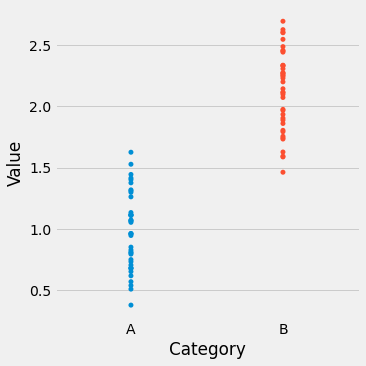

In [22]:
sns.catplot(x="Category",y="Value",jitter=False,data=df);

***
## END

< [Table of Contents](#top) | [Abstract](#abstract) | [Introduction](#introduction) | [Conclusion](#conclusion) | [References](#references) >
<a id="solution"></a>
***
## Solution
***

< [Table of Contents](#top) | [References](#references) >
<a id="scipy"></a>
***
###### ``scipy``
***

&#x1F6A7; 

< [Table of Contents](#top) | [References](#references) >
<a id="scipystats"></a>
***
###### ``stats``
***

In [ ]:
# import scipy.stats as ss

- want the ``t-test`` to tell whether the numbers came from a distribution [2]

- so the whole point of the t-test here is for ``scipy.stats`` to tell whether the ``A`` numbers are different from the ``B`` numbers [2]

<!-- - refer [Appendix](#appendix-df) to view the full dataset <a id="go-back-df"></a> -->
<!-- print(fGetModuleType(___x___),fDocumentation(___x___)) -->
***
## END

< [Table of Contents](#top) | [Abstract](#abstract) | [Introduction](#introduction) | [Solution](#solution) | [References](#references) >
<a id="conclusion"></a>
***
## Conclusion
***

&#x1F6A7;

***
## END

< [Table of Contents](#top) | [Abstract](#abstract) | [Introduction](#introduction) | [Solution](#solution) | [Conclusion](#conclusion) | [References](#references) >
<a id="references"></a>
***
## References
***
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1] I. McLoughlin, "t-tests in Python setup," GMIT, October 2020.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2] I. McLoughlin, "Simulating data for a t-test," GMIT, October 2020.

***
## END

< [Table of Contents](#top) | [Abstract](#abstract) | [Introduction](#introduction) | [Solution](#solution) | [Conclusion](#conclusion) | [References](#references) >
<a id="appendix"></a>
***
## Appendix
***

&#x1F6A7;

***
## END

# END JUPYTER NOTEBOOK